## introduction
Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import warnings
from sklearn.exceptions import DataConversionWarning
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import preprocessing
from yellowbrick.regressor import ManualAlphaSelection
from yellowbrick.regressor import AlphaSelection
from statsmodels.api import OLS

# The format of the images
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 



In [2]:
# read the Dataset
df = pd.read_csv("C:/Users/الوعد للحاسبات/Downloads/SeoulBikeData.csv")

In [3]:
# Show the attribute of my dataset
df.info()
# As we see ther is no no null value in all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(�C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(�C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## Dataset Description
There is:<br><b>8760 row</b><br><b>14 columns</b><br>Attribute Information:<br>
Date : year-month-day<br>
Rented Bike count - Count of bikes rented at each hour<br>
Hour - Hour of the day (24 format)<br>
Temperature-Temperature in Celsius<br>
Humidity - %<br>
Windspeed - m/s<br>
Visibility - 10m<br>
Dew point temperature - Celsius<br>
Solar radiation - MJ/m2<br>
Rainfall - mm<br>
Snowfall - cm<br>
Seasons - Winter, Spring, Summer, Autumn<br>
Holiday - Holiday/No holiday<br>
Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)<br>

In [4]:
df.sample(5)

Date  Rented Bike Count  Hour  Temperature(�C)  Humidity(%)  \
6422  25/08/2018               1261    14             29.2           52   
2036  23/02/2018                295    20              6.4           77   
8509  20/11/2018                798    13             11.6           20   
8403  16/11/2018                262     3              7.4           63   
8029  31/10/2018                983    13             11.2           34   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(�C)  \
6422               3.1              1735                       18.3   
2036               2.8               316                        2.6   
8509               1.3              1821                      -10.6   
8403               0.6               699                        0.8   
8029               2.6              1940                       -4.1   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
6422                     2.68           0.0            0.0  Summer   
2036                     0.00           0.0            0.0  Winter   
8509                     1.87           0.0            0.0  Autumn   
8403                     0.00           0.0            0.0  Autumn   
8029                     2.26           0.0            0.0  Autumn   

         Holiday Functioning Day  
6422  No Holiday             Yes  
2036  No Holiday             Yes  
8509  No Holiday             Yes  
8403  No Holiday             Yes  
8029  No Holiday             Yes

# Questions


### is temperature associated with bike rentals?

### Can the number of total bike rentals be predicted by holiday and weather?







## Exploratory Data Analysis (EDA)

change the format of date to (months [1,2,....12] - weekday[sturday, sunday ... etc] - number of day in the week)

In [5]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [6]:
df['WeekDay']=df['Date'].dt.day_name()

In [7]:
df['Month']=df['Date'].dt.month

In [8]:
mapping_dictDay={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

df['WeekDayEncoding']=df['WeekDay'].map(mapping_dictDay)

In [9]:
df

Date  Rented Bike Count  Hour  Temperature(�C)  Humidity(%)  \
0    2017-01-12                254     0             -5.2           37   
1    2017-01-12                204     1             -5.5           38   
2    2017-01-12                173     2             -6.0           39   
3    2017-01-12                107     3             -6.2           40   
4    2017-01-12                 78     4             -6.0           36   
...         ...                ...   ...              ...          ...   
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(�C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day   WeekDay  Month  WeekDayEncoding  
0     No Holiday             Yes  Thursday      1                4  
1     No Holiday             Yes  Thursday      1                4  
2     No Holiday             Yes  Thursday      1                4  
3     No Holiday             Yes  Thursday      1                4  
4     No Holiday             Yes  Thursday      1                4  
...          ...             ...       ...    ...              ...  
8755  No Holiday             Yes    Friday     11                5  
8756  No Holiday             Yes    Friday     11                5  
8757  No Holiday             Yes    Friday     11                5  
8758  No Holiday             Yes    Friday     11                5  
8759  No Holiday             Yes    Friday     11                5  

[8760 rows x 17 columns]

# make some plot to understant the dataset

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)


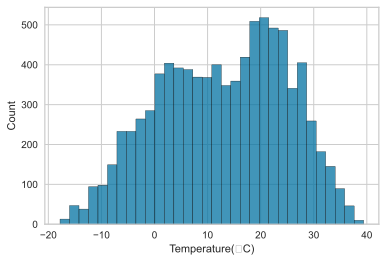

In [10]:
sns.histplot(data=df, x="Temperature(�C)")


# Saving the Seaborn Figure:



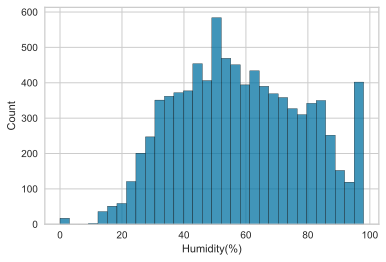

In [11]:
sns.histplot(data=df, x="Humidity(%)")


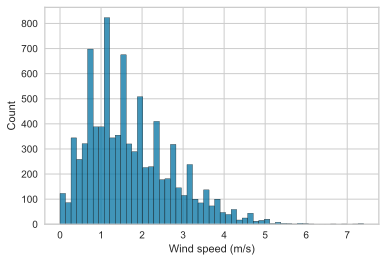

In [12]:
sns.histplot(data=df, x="Wind speed (m/s)")


<AxesSubplot:xlabel='Visibility (10m)', ylabel='Count'>

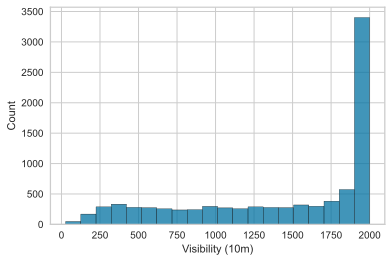

In [13]:
sns.histplot(data=df, x="Visibility (10m)")

<AxesSubplot:xlabel='Solar Radiation (MJ/m2)', ylabel='Count'>

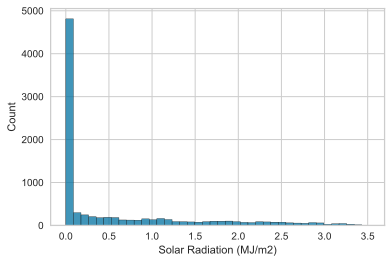

In [14]:
sns.histplot(data=df, x="Solar Radiation (MJ/m2)")

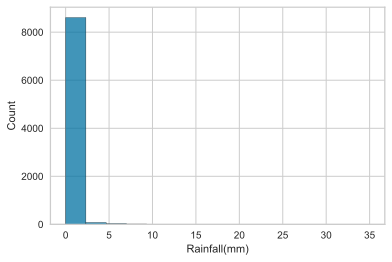

In [15]:
sns.histplot(data=df, x="Rainfall(mm)")
#plt.savefig('Rainfall.png')

<AxesSubplot:xlabel='Snowfall (cm)', ylabel='Count'>

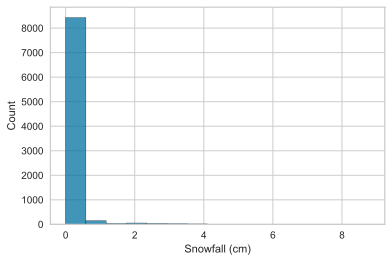

In [17]:
sns.histplot(data=df, x="Snowfall (cm)")
#plt.savefig('Snowfall.png')

### Snowfall and Rainfall are highly skewed

In [18]:
df.skew().sort_values(ascending=True) 

Visibility (10m)             -0.701786
Dew point temperature(�C)    -0.367298
Temperature(�C)              -0.198326
Month                        -0.010458
Hour                          0.000000
WeekDayEncoding               0.000688
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

## Compute pairwise correlation of columns

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)


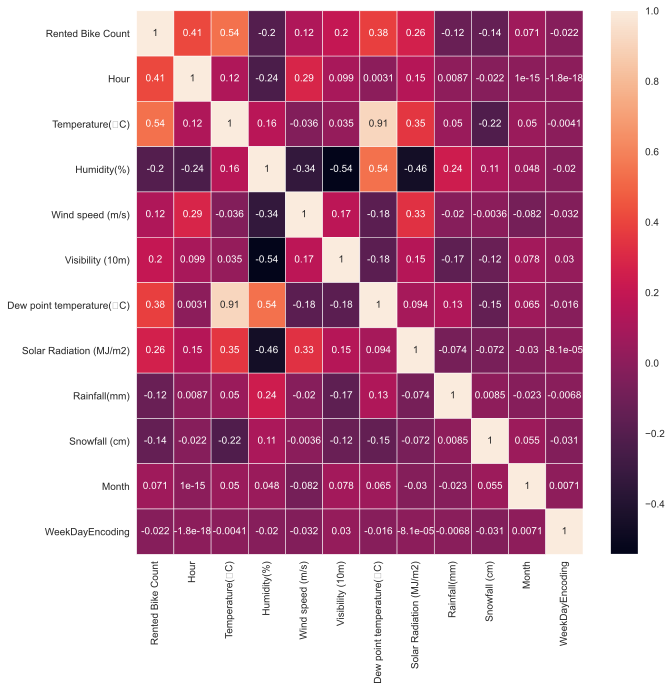

<Figure size 432x288 with 0 Axes>

In [19]:
corrMatrix = df.corr()

fig, ax = plt.subplots(figsize=(10,10)) # 
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()
plt.savefig('corr.png')

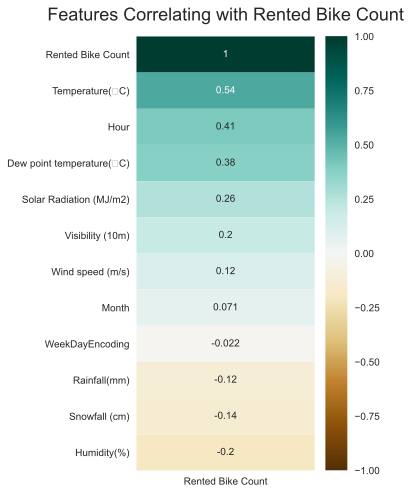

In [20]:
plt.figure(figsize=(4, 8))
heatmap = sns.heatmap(corrMatrix[['Rented Bike Count']].sort_values(by='Rented Bike Count', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Rented Bike Count', fontdict={'fontsize':18}, pad=16);
plt.savefig('cddr.png')

In [21]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['Temperature(�C)','Hour','Dew point temperature(�C)'], y_vars='Rented Bike Count', size=4, aspect=0.7)

C:\anaconda\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\anaconda\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)


In [22]:
rented_bike_corr = pd.DataFrame(corrMatrix.iloc[:, 0])

In [23]:
rented_bike_corr

Rented Bike Count
Rented Bike Count                   1.000000
Hour                                0.410257
Temperature(�C)                     0.538558
Humidity(%)                        -0.199780
Wind speed (m/s)                    0.121108
Visibility (10m)                    0.199280
Dew point temperature(�C)           0.379788
Solar Radiation (MJ/m2)             0.261837
Rainfall(mm)                       -0.123074
Snowfall (cm)                      -0.141804
Month                               0.070861
WeekDayEncoding                    -0.021577

In [24]:
significant = rented_bike_corr[abs(rented_bike_corr) >= 0.05]
significant['Use'] = significant['Rented Bike Count'].notna()

In [25]:
significant_col = significant.index[significant['Use']].tolist()
significant_col.remove('Rented Bike Count')
significant_col.remove('Dew point temperature(�C)') # Due to high correlation with regular temperature
significant_col.remove('Rainfall(mm)') # Highly skewed towards 0
significant_col.remove('Snowfall (cm)') # Highly skewed towards 0
significant_col

['Hour',
 'Temperature(�C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Month']

In [26]:
df[significant_col]

Hour  Temperature(�C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0        0             -5.2           37               2.2              2000   
1        1             -5.5           38               0.8              2000   
2        2             -6.0           39               1.0              2000   
3        3             -6.2           40               0.9              2000   
4        4             -6.0           36               2.3              2000   
...    ...              ...          ...               ...               ...   
8755    19              4.2           34               2.6              1894   
8756    20              3.4           37               2.3              2000   
8757    21              2.6           39               0.3              1968   
8758    22              2.1           41               1.0              1859   
8759    23              1.9           43               1.3              1909   

      Solar Radiation (MJ/m2)  Month  
0                         0.0      1  
1                         0.0      1  
2                         0.0      1  
3                         0.0      1  
4                         0.0      1  
...                       ...    ...  
8755                      0.0     11  
8756                      0.0     11  
8757                      0.0     11  
8758                      0.0     11  
8759                      0.0     11  

[8760 rows x 7 columns]

In [28]:
X = df[significant_col]
y = df['Rented Bike Count']

## Regular Linear Regression

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0)

In [30]:
X_train

Hour  Temperature(�C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
8639    23              3.8           83               1.1               390   
3614    14             24.0           47               2.3               520   
1387    19             -7.1           33               2.0              1887   
3900    12             12.3           97               0.8               238   
8044     4              3.6           70               0.8              1934   
...    ...              ...          ...               ...               ...   
4373     5             17.8           75               1.0              1210   
7891    19             16.4           47               1.0              1694   
4859    11             25.5           57               1.8               943   
3264     0              8.3           59               2.1              1912   
2732    20              7.1           83               3.3               203   

      Solar Radiation (MJ/m2)  Month  
8639                     0.00     11  
3614                     2.87      4  
1387                     0.00      1  
3900                     0.14     12  
8044                     0.00      1  
...                       ...    ...  
4373                     0.00      1  
7891                     0.00     10  
4859                     3.01      6  
3264                     0.00      4  
2732                     0.00      3  

[6570 rows x 7 columns]

In [31]:
y_train

8639     379
3614    1055
1387     122
3900      11
8044     147
        ... 
4373     306
7891    1968
4859    1066
3264     401
2732     513
Name: Rented Bike Count, Length: 6570, dtype: int64

In [32]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.intercept_, linreg.coef_)


412.81927550405726 [ 2.66161766e+01  3.14048217e+01 -8.15887066e+00  9.11338521e+00
  2.06858745e-02 -8.16839802e+01  9.63193972e+00]


In [33]:

model = OLS(y_train, X_train)
results = model.fit()


print(f'w= {results.params}')

w= Hour                       29.393870
Temperature(�C)            29.734088
Humidity(%)                -4.471676
Wind speed (m/s)           21.984577
Visibility (10m)            0.102791
Solar Radiation (MJ/m2)   -44.897173
Month                      12.613468
dtype: float64


In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.755
Model:                            OLS   Adj. R-squared (uncentered):              0.755
Method:                 Least Squares   F-statistic:                              2887.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):                        0.00
Time:                        00:48:21   Log-Likelihood:                         -49802.
No. Observations:                6570   AIC:                                  9.962e+04
Df Residuals:                    6563   BIC:                                  9.967e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Hour                       29.3939      0.869     33.812      0.000      27.690      31.098
Temperature(�C)            29.7341      0.581     51.148      0.000      28.594      30.874
Humidity(%)                -4.4717      0.223    -20.012      0.000      -4.910      -4.034
Wind speed (m/s)           21.9846      6.237      3.525      0.000       9.757      34.212
Visibility (10m)            0.1028      0.009     12.054      0.000       0.086       0.120
Solar Radiation (MJ/m2)   -44.8972      8.415     -5.335      0.000     -61.393     -28.401
Month                      12.6135      1.681      7.503      0.000       9.318      15.909
==============================================================================
Omnibus:                      579.417   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1057.599
Skew:                           0.615   Prob(JB):                    2.21e-230
Kurtosis:                       4.532   Cond. No.                     2.40e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
y_pred = linreg.predict(X_test)

In [35]:
y_pred.reshape(1,-1).shape

(1, 2190)

In [36]:
np.array(y_test).reshape(-1,1).shape

(2190, 1)

In [37]:
print('Variance score: %.3f' % linreg.score(X_test,y_test)) # Also the r^2

Variance score: 0.450


In [38]:
print('R^2: %.3f' % r2_score(y_test, y_pred))
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: %.3f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.450
Mean Absolute Error: 356.657
Mean Squared Error: 229462.502
Root Mean Squared Error: 479.022


## Lasso Regression

In [39]:
alphas = 10**np.linspace(10,-2,100)*0.5

Text(0, 0.5, 'weights')

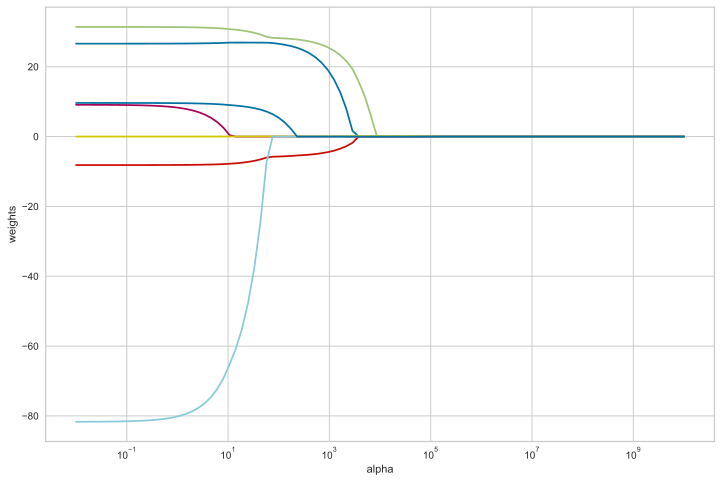

In [40]:
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

plt.figure(figsize=(12, 8))    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [41]:
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000, random_state=0)
lassocv.fit(X, y)

LassoCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, max_iter=100000, random_state=0)

In [42]:
print("Alpha: %.3f" % lassocv.alpha_)
print('R^2: %.3f' % r2_score(y, lassocv.predict(X)))
print('Mean Squared Error: %.3f' % mean_squared_error(y, lassocv.predict(X)))

Alpha: 7.087
R^2: 0.462
Mean Squared Error: 223710.438


In [43]:
pd.Series(lassocv.coef_, index=X.columns)

Hour                       26.840736
Temperature(�C)            30.685050
Humidity(%)                -7.851534
Wind speed (m/s)            0.000000
Visibility (10m)            0.027070
Solar Radiation (MJ/m2)   -63.185088
Month                       8.737983
dtype: float64

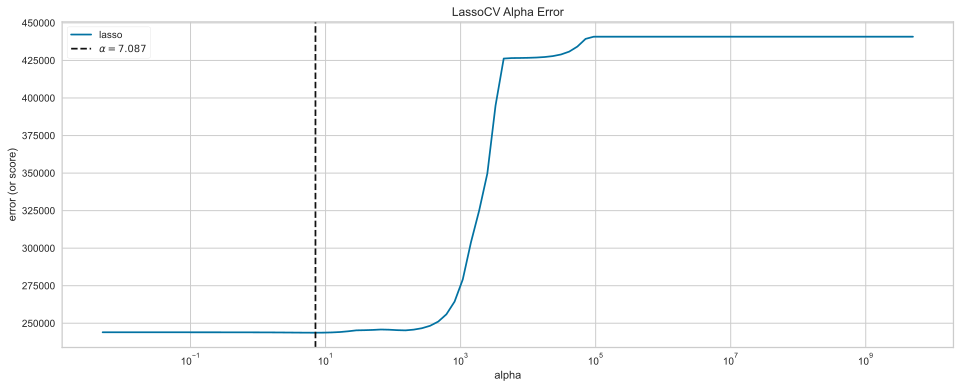

<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [44]:
# Instantiate the linear model and visualizer
model = LassoCV(alphas = alphas, cv = 10, max_iter = 100000, random_state=0)
visualizer = AlphaSelection(model)
plt.figure(figsize=(16, 6)) 
visualizer.ax.set_xscale('log')
visualizer.fit(X, y)
visualizer.show()

In [45]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
print('Mean Squared Error: %.3f' % mean_squared_error(y_test, lasso.predict(X_test)))
print('R^2: %.3f' % r2_score(y_test,lasso.predict(X_test)))

Mean Squared Error: 229623.346
R^2: 0.449


In [46]:
lasso_cross_val_scores = cross_val_score(lasso,X,y, scoring='neg_mean_squared_error', cv=lassocv.cv)
cross_val_scores = np.sqrt(np.abs(lasso_cross_val_scores)) 
print(cross_val_scores)
print("mean:", np.mean(cross_val_scores))

[298.4191577  292.56438439 303.38157176 380.1540934  583.80339348
 674.21897309 589.92171748 569.06473326 609.93853312 432.00682821]
mean: 473.347338588263


In [47]:
pd.Series(lasso.coef_, index=X.columns)

Hour                       26.928093
Temperature(�C)            30.607955
Humidity(%)                -7.655168
Wind speed (m/s)            0.000000
Visibility (10m)            0.028871
Solar Radiation (MJ/m2)   -60.787413
Month                       8.884185
dtype: float64

## --------------------

In [49]:

print(np.mean(y_test==y_pred))


0.0


In [50]:
dataset = pd.read_csv("C:/Users/الوعد للحاسبات/Downloads/SeoulBikeData.csv")


1. How do the temperatures change across the seasons? What are the mean and median temperatures?

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


C:\anaconda\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)


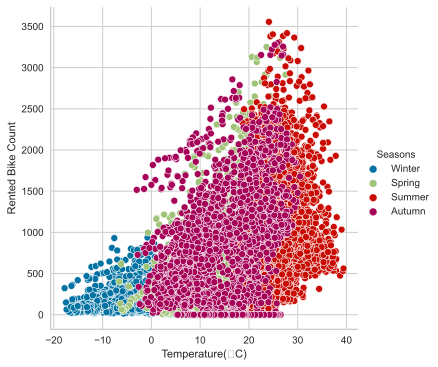

In [51]:
sns.relplot(data=dataset, x="Temperature(�C)", y="Rented Bike Count", hue="Seasons")

## groub data by day

In [52]:
DD = dataset.groupby(['Date', 'Seasons', 'Holiday' , 'Functioning Day'], as_index=False).agg( \
                                                                                   {'Rented Bike Count': 'sum',\
                                                                                    'Temperature(�C)' : 'mean',\
                                                                                    'Visibility (10m)' : 'mean',\
                                                                                    'Humidity(%)' : 'mean',                                                                                   
                                                                                   })

In [53]:
DD

Date Seasons     Holiday Functioning Day  Rented Bike Count  \
0    01/01/2018  Winter     Holiday             Yes               4290   
1    01/02/2018  Winter  No Holiday             Yes               5377   
2    01/03/2018  Spring     Holiday             Yes               5132   
3    01/04/2018  Spring  No Holiday             Yes              17388   
4    01/05/2018  Spring     Holiday             Yes              26820   
..          ...     ...         ...             ...                ...   
361  31/05/2018  Spring  No Holiday             Yes              31681   
362  31/07/2018  Summer  No Holiday             Yes              22897   
363  31/08/2018  Summer  No Holiday             Yes              27817   
364  31/10/2018  Autumn  No Holiday             Yes              21545   
365  31/12/2017  Winter     Holiday             Yes               3423   

     Temperature(�C)  Visibility (10m)  Humidity(%)  
0          -1.283333       1894.833333    39.333333  
1          -3.866667       1923.625000    44.000000  
2           0.450000       1084.000000    64.208333  
3          15.183333        831.833333    68.916667  
4          20.341667        456.458333    72.791667  
..               ...               ...          ...  
361        20.525000       1246.208333    61.208333  
362        32.525000       1993.791667    49.625000  
363        25.558333       1609.000000    67.166667  
364         7.529167       1960.916667    55.000000  
365         0.087500       1120.291667    59.083333  

[366 rows x 8 columns]

## Unfortunately there is only 366 after groubing the dataset it too small so the i make this step at last

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)


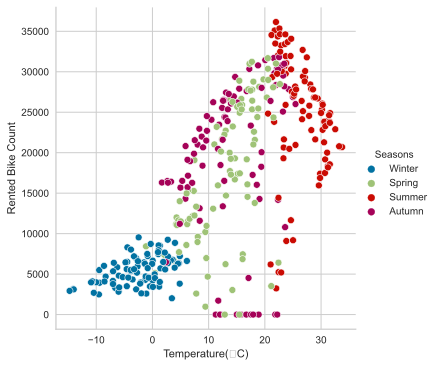

In [54]:
sns.relplot(data=DD, x="Temperature(�C)", y="Rented Bike Count", hue="Seasons")
plt.savefig('sees.png')

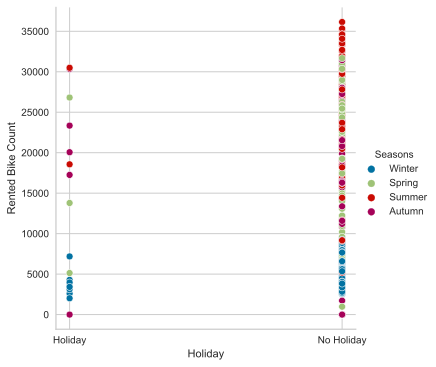

In [55]:
sns.relplot(data=DD, x="Holiday", y="Rented Bike Count", hue="Seasons")

Is there a correlation between the temp and the total count of bike rentals?

In [56]:
#s1.corr(s2, method=histogram_intersection)
DD1 = DD['Temperature(�C)']
DD2  = DD['Rented Bike Count']
DD1.corr(DD2)


0.6955911345239881

<AxesSubplot:xlabel='Holiday', ylabel='count'>

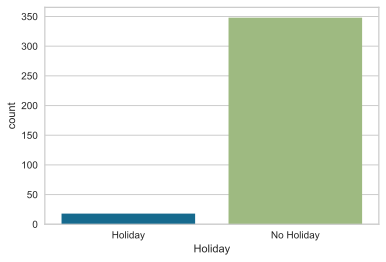

In [57]:
sns.countplot(x="Holiday", data=DD)

In [58]:
DD['Date'] = pd.to_datetime(DD['Date'])

In [59]:
DD['Year'] = DD['Date'].dt.year
DD['Month'] = DD['Date'].dt.month
DD['Day'] = DD['Date'].dt.day
DD.tail()

Date Seasons     Holiday Functioning Day  Rented Bike Count  \
361 2018-05-31  Spring  No Holiday             Yes              31681   
362 2018-07-31  Summer  No Holiday             Yes              22897   
363 2018-08-31  Summer  No Holiday             Yes              27817   
364 2018-10-31  Autumn  No Holiday             Yes              21545   
365 2017-12-31  Winter     Holiday             Yes               3423   

     Temperature(�C)  Visibility (10m)  Humidity(%)  Year  Month  Day  
361        20.525000       1246.208333    61.208333  2018      5   31  
362        32.525000       1993.791667    49.625000  2018      7   31  
363        25.558333       1609.000000    67.166667  2018      8   31  
364         7.529167       1960.916667    55.000000  2018     10   31  
365         0.087500       1120.291667    59.083333  2017     12   31

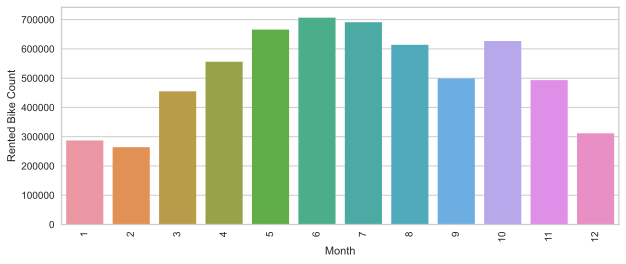

In [60]:
Month = DD.groupby("Month").sum().reset_index()
plt.figure(figsize=(10,4), dpi=150)
sns.barplot(x="Month", y="Rented Bike Count", data=Month)
plt.xticks(rotation=90);
plt.savefig('month.png')

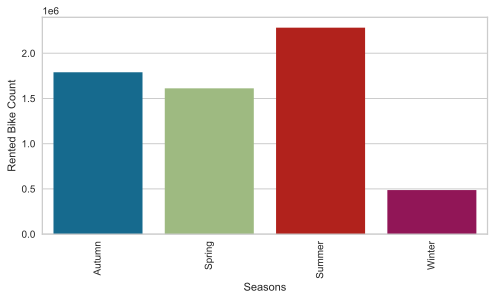

In [61]:
Season = DD.groupby("Seasons").sum().reset_index()
plt.figure(figsize=(8,4), dpi=150)
sns.barplot(x="Seasons", y="Rented Bike Count", data=Season)
plt.xticks(rotation=90);
plt.savefig('ss.png')

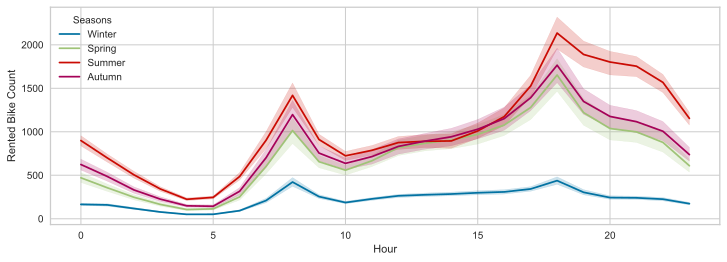

In [62]:
plt.figure(figsize=(12,4), dpi=100)
sns.lineplot(data=df, x="Hour", y="Rented Bike Count", hue="Seasons")
plt.savefig('hour.png')

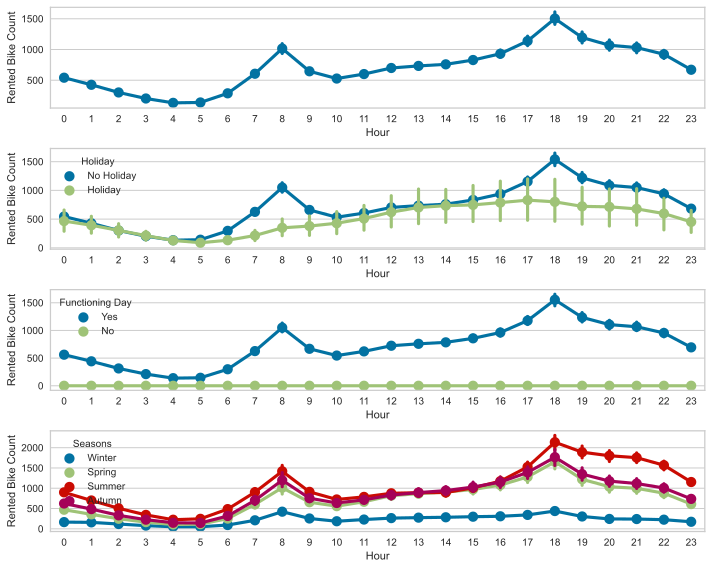

In [63]:
fig, axs = plt.subplots(nrows=4,ncols=1,figsize=(10,8), dpi=100)
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", ax=axs[0])
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", ax=axs[1], 
              hue="Holiday")
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", ax=axs[2], 
              hue="Functioning Day")
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", ax=axs[3], 
              hue="Seasons")
plt.tight_layout()

## Get mean ,  median and std

In [134]:
Temp_df = df[['Seasons', 'Temperature(�C)']]

In [135]:
Temp_df

Seasons  Temperature(�C)
0     Winter             -5.2
1     Winter             -5.5
2     Winter             -6.0
3     Winter             -6.2
4     Winter             -6.0
...      ...              ...
8755  Autumn              4.2
8756  Autumn              3.4
8757  Autumn              2.6
8758  Autumn              2.1
8759  Autumn              1.9

[8760 rows x 2 columns]

In [136]:
Sdf = Temp_df[Temp_df['Seasons'] == 'Spring']
Smdf = Temp_df[Temp_df['Seasons'] == 'Summer']
Adf = Temp_df[Temp_df['Seasons'] == 'Autumn']
Wdf = Temp_df[Temp_df['Seasons'] == 'Winter']

In [137]:
print("Spring: ")
print(f"The mean temperature of Spring was {Sdf['Temperature(�C)'].mean()}.")
print(f"The median temperature of Spring was {Sdf['Temperature(�C)'].median()}.")
print(f"The standard deviation of the temperature in Spring was {Sdf['Temperature(�C)'].std()}.")
print("Summer: ")
print(f"The mean temperature of Summer was {Smdf['Temperature(�C)'].mean()}.")
print(f"The median temperature of Summer was {Smdf['Temperature(�C)'].median()}.")
print(f"The standard deviation of the temperature in Summer was {Smdf['Temperature(�C)'].std()}.")
print("Autumn: ")
print(f"The mean temperature of Autumn was {Adf['Temperature(�C)'].mean()}.")
print(f"The median temperature of Autumn was {Adf['Temperature(�C)'].median()}.")
print(f"The standard deviation of the temperature in Autumn was {Adf['Temperature(�C)'].std()}.")
print("Winter: ")
print(f"The mean temperature of Winter was {Wdf['Temperature(�C)'].mean()}.")
print(f"The median temperature of Winter was {Wdf['Temperature(�C)'].mean()}.")
print(f"The standard deviation of the temperature in Winter was {Wdf['Temperature(�C)'].std()}.")

Spring: 
The mean temperature of Spring was 13.046693840579712.
The median temperature of Spring was 13.3.
The standard deviation of the temperature in Spring was 6.61715431649567.
Summer: 
The mean temperature of Summer was 26.582789855072505.
The median temperature of Summer was 26.6.
The standard deviation of the temperature in Summer was 4.662298828316205.
Autumn: 
The mean temperature of Autumn was 14.1208333333333.
The median temperature of Autumn was 13.850000000000001.
The standard deviation of the temperature in Autumn was 7.062296647442591.
Winter: 
The mean temperature of Winter was -2.5404629629629607.
The median temperature of Winter was -2.5404629629629607.
The standard deviation of the temperature in Winter was 5.469762920730906.
